/mnt/workspace/src


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [1]:
# -*- coding: utf-8 -*-
%cd ./src
import openai
from pyvirtualdisplay import Display
import torch
import open3d as o3d

from arguments import get_config, load_config
from interfaces import setup_LMP, LMP_interface
from visualizers import ValueMapVisualizer
from envs.rlbench_env import VoxPoserRLBench
from utils import set_lmp_objects
import numpy as np
from rlbench import tasks
import engine_interfaces

from VLMPipline.VLM import VLM

torch.set_grad_enabled(False)
disp = Display(visible=False, size=(1920, 1080))
disp.start()

# load other config file (LMP, visualization, visual env, etc.)
config = get_config("rlbench")
# load engine config file (spark v3)
sparkv3_engine_config = load_config(
    "/mnt/workspace/src/configs/sparkv3_config.yaml"
)
erniev4_engine_config = load_config(
    "/mnt/workspace/src/configs/ERNIEv4_config.yaml"
)
print(sparkv3_engine_config)
print(erniev4_engine_config)

# vlm config
owlv2_model_path = "/models/google-owlv2-large-patch14-finetuned"
owlv2_model_path = "/models/google-owlv2-base-patch16-ensemble"
sam_model_path = "/models/facebook-sam-vit-huge"
# sam_model_path = "/models/facebook-sam-vit-base"
xmem_model_path = "/models/XMem.pth"
resnet_18_path = "/models/resnet18.pth"
resnet_50_path = "/models/resnet50.pth"

/mnt/workspace/src


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Using GPU
Using GPU
{'type': 'Spark', 'version': 'V3', 'url': 'ws://spark-api.xf-yun.com/v3.1/chat', 'domain': 'generalv3', 'secret': {'appid': 'c314f110', 'api_secret': 'MzNiMDNhZTdmZWM2OWQ0YmUzNDZiZDk2', 'api_key': '3e8a81eab91204a5575f887483156210'}, 'model_instruction': '你现在是一个写代码专家，续写下列这段代码（尤其需要根据最后一行的注释完成接下去的代码），不要出现其他解释性语句，以最后一行注释开头', 'model_params': ['temperature', 'max_tokens', 'top_k', 'domain']}
{'type': 'ERNIE', 'version': 'V4', 'secret': {'api_key': '9TWuRtM1CEvf0bl5bqXpGTK7', 'secret_key': 'vv77QBFSG3y7qYUi19XVTlNCbUN9PpPA'}, 'url_cred': 'https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&client_id=${api_key}&client_secret=${secret_key}', 'url': 'https://aip.baidubce.com/rpc/2.0/ai_custom/v1/wenxinworkshop/chat/completions_pro?access_token=', 'model_instruction': '续写代码，第一句话必须是续写的代码（就是新的

Hyperparameters read from the model weights: C^k=64, C^v=512, C^h=64
Single object mode: False


QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'


Camera parameters: {'front': {'extrinsic_params': array([[ 1.19209290e-07, -4.22617942e-01, -9.06307936e-01,
         1.34999919e+00],
       [-1.00000000e+00, -5.96046448e-07,  1.49011612e-07,
         3.71546562e-08],
       [-5.66244125e-07,  9.06307936e-01, -4.22617912e-01,
         1.57999933e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'intrinsic_params': array([[-879.192802,    0.      ,  320.      ],
       [   0.      , -879.192802,  320.      ],
       [   0.      ,    0.      ,    1.      ]]), 'far_near': (4.5, 0.009999999776482582)}, 'left_shoulder': {'extrinsic_params': array([[ 1.73648179e-01,  8.92538846e-01,  4.16198105e-01,
        -1.74999714e-01],
       [ 9.84807789e-01, -1.57378674e-01, -7.33871460e-02,
         2.00000003e-01],
       [-1.78813934e-07,  4.22618657e-01, -9.06307697e-01,
         1.97999895e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'intrinsic_params': 

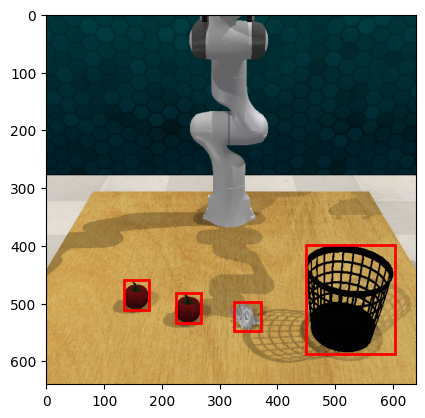

[[449.5193786621094, 398.68731689453125, 604.0708618164062, 587.2745971679688]]
[[[449.5193786621094, 398.68731689453125, 604.0708618164062, 587.2745971679688]]]
[[[[526.7951202392578, 492.98095703125]]]]
label 0 mask result 0 iou score:0.9195290207862854
label True use color [253 231  36]
label 0 mask result 1 iou score:1.0089796781539917
label True use color [253 231  36]
label 0 mask result 2 iou score:0.9922502040863037
label True use color [253 231  36]


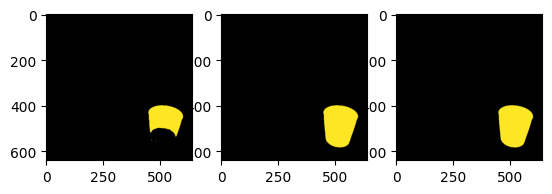

best mask:
label 1 use color [253 231  36]


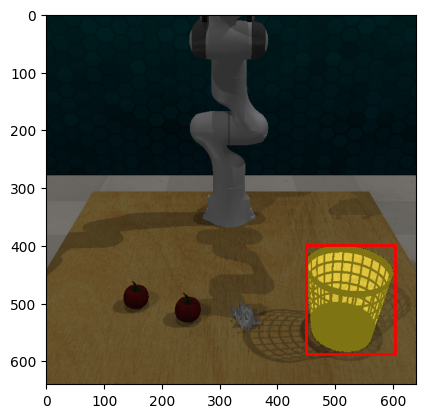

[[134.5476837158203, 459.7850036621094, 177.87474060058594, 510.927734375], [223.8849639892578, 480.6362609863281, 267.8752136230469, 533.9491577148438]]
[[[134.5476837158203, 459.7850036621094, 177.87474060058594, 510.927734375], [223.8849639892578, 480.6362609863281, 267.8752136230469, 533.9491577148438]]]
[[[[156.21121215820312, 485.3563690185547]], [[245.88008880615234, 507.29270935058594]]]]
label 0 mask result 0 iou score:0.9761353731155396
label True use color [253 231  36]
label 0 mask result 1 iou score:0.9915690422058105
label True use color [253 231  36]
label 0 mask result 2 iou score:0.991195797920227
label True use color [253 231  36]


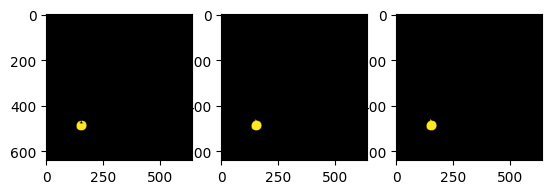

label 1 mask result 0 iou score:0.9742806553840637
label True use color [253 231  36]
label 1 mask result 1 iou score:0.9877533912658691
label True use color [253 231  36]
label 1 mask result 2 iou score:0.9881963729858398
label True use color [253 231  36]


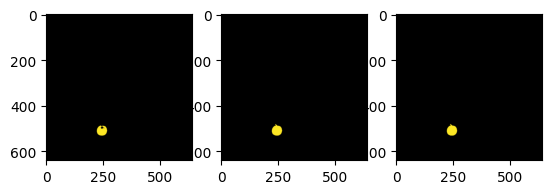

best mask:
label 1 use color [ 32 144 140]
label 2 use color [253 231  36]


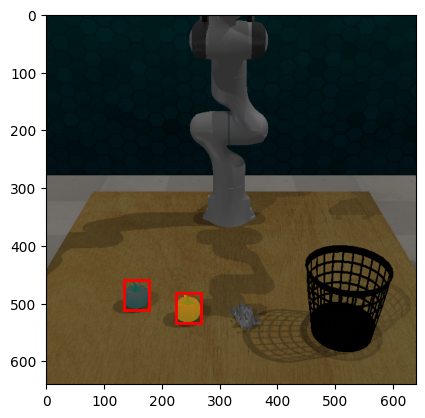

[[324.70416259765625, 496.2248229980469, 371.0683898925781, 547.3895263671875]]
[[[324.70416259765625, 496.2248229980469, 371.0683898925781, 547.3895263671875]]]
[[[[347.8862762451172, 521.8071746826172]]]]
label 0 mask result 0 iou score:0.977544367313385
label True use color [253 231  36]
label 0 mask result 1 iou score:0.9791421890258789
label True use color [253 231  36]
label 0 mask result 2 iou score:0.9767975807189941
label True use color [253 231  36]


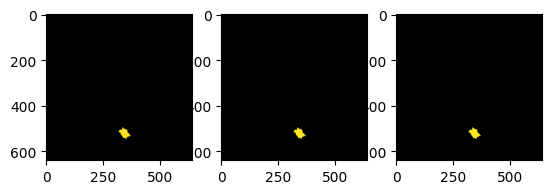

best mask:
label 1 use color [253 231  36]


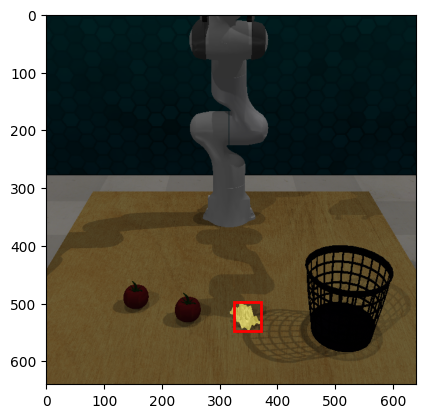

detect 4 objects in mask
label mapping dict:{0: 0, 1: 101, 2: 201, 3: 202, 4: 301}
inv label mapping dict:{0: 0, 101: 1, 201: 2, 202: 3, 301: 4}


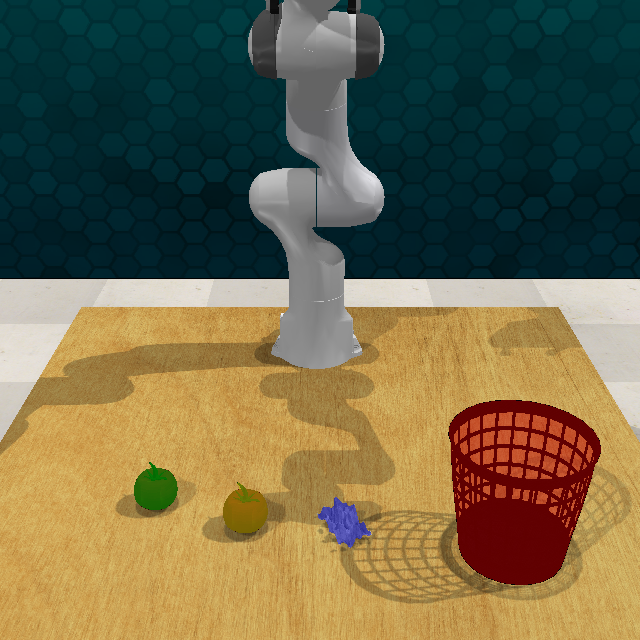

##################################################
## voxel resolution: [0.0105 0.0131 0.01  ]
##################################################


calling level: 8
*** OpenAI API call took 3.45s ***
########################################
## "planner" generated code
## context: "objects = ['bin', 'tomato', 'rubbish']"
########################################
objects = ['bin', 'tomato', 'rubbish']
# Query: put rubbish in bin.
composer("grasp the rubbish")
composer("move to 10cm above the bin")
composer("open gripper")


calling level: 9
(using cache) *** OpenAI API call took 0.00s ***
########################################
## "composer" generated code
########################################
# Query: grasp the rubbish.
movable = parse_query_obj('gripper')
affordance_map = get_affordance_map('a point at the center of the rubbish')
gripper_map = get_gripper_map('open everywhere except 1cm around the rubbish')
execute(movable, affordance_map=affordance_map, gripper_map=gripper_map)


c

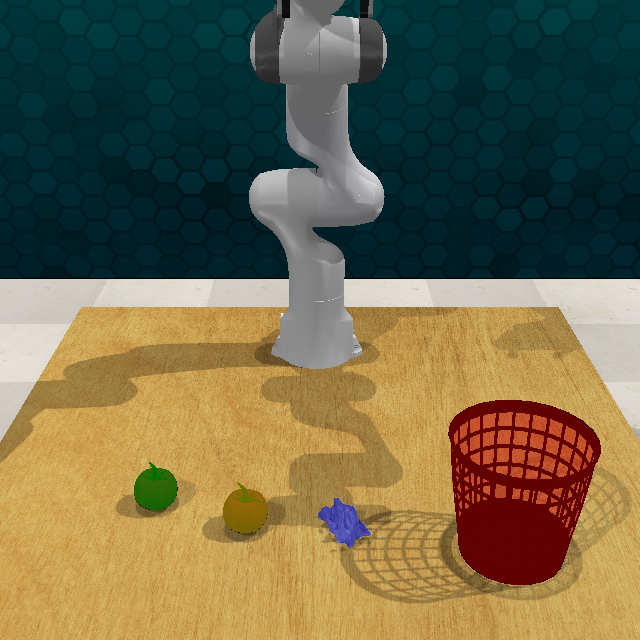

calling detect VLM enable: True
[interfaces.py | 16:28:24] completed waypoint 1 (wp: [0.287 0.006 1.469], actual: [0.287 0.006 1.469], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.707)
calling detect VLM enable: True
[interfaces.py | 16:28:27] completed waypoint 2 (wp: [0.294 0.015 1.449], actual: [0.294 0.014 1.449], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.687)
calling detect VLM enable: True
[interfaces.py | 16:28:31] completed waypoint 3 (wp: [0.299 0.022 1.429], actual: [0.299 0.021 1.428], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.666)
calling detect VLM enable: True
[interfaces.py | 16:28:34] completed waypoint 4 (wp: [0.303 0.027 1.409], actual: [0.303 0.027 1.408], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.646)
calling detect VLM enable: True
[interfaces.py | 16:28:37] completed waypoint 5 (wp: [0.307 0.032 1.388], actual: [0.307 0.032 1.388], target: [0.308 0.

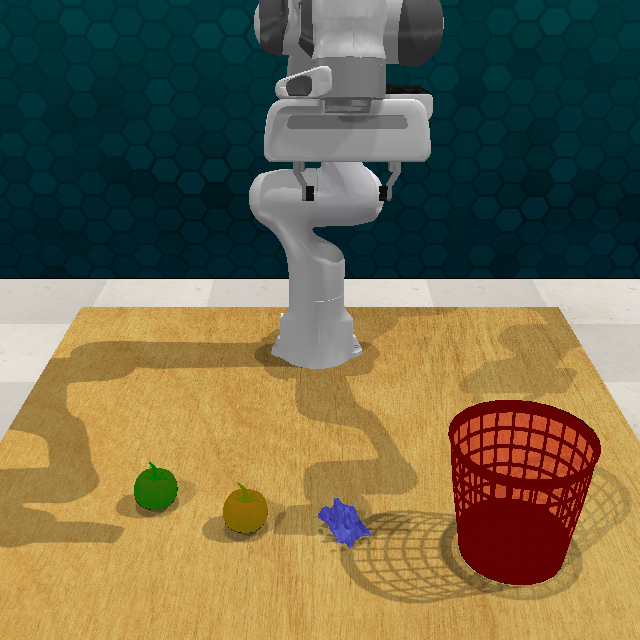

calling detect VLM enable: True
[interfaces.py | 16:28:58] completed waypoint 11 (wp: [0.309 0.032 1.257], actual: [0.309 0.032 1.257], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.495)
calling detect VLM enable: True
[interfaces.py | 16:29:2] completed waypoint 12 (wp: [0.308 0.029 1.237], actual: [0.308 0.03  1.237], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.475)
calling detect VLM enable: True
[interfaces.py | 16:29:5] completed waypoint 13 (wp: [0.307 0.026 1.217], actual: [0.307 0.026 1.217], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.455)
calling detect VLM enable: True
[interfaces.py | 16:29:9] completed waypoint 14 (wp: [0.306 0.021 1.196], actual: [0.306 0.021 1.197], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.435)
calling detect VLM enable: True
[interfaces.py | 16:29:12] completed waypoint 15 (wp: [0.305 0.015 1.176], actual: [0.305 0.015 1.176], target: [0.308 

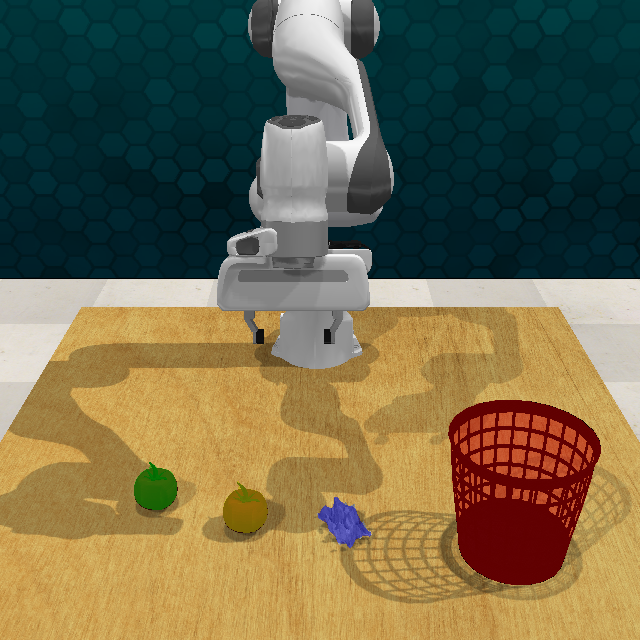

calling detect VLM enable: True
[interfaces.py | 16:29:33] completed waypoint 21 (wp: [ 0.298 -0.035  1.055], actual: [ 0.298 -0.035  1.055], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.301)
calling detect VLM enable: True
[interfaces.py | 16:29:36] completed waypoint 22 (wp: [ 0.298 -0.043  1.035], actual: [ 0.298 -0.043  1.035], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.283)
calling detect VLM enable: True
[interfaces.py | 16:29:40] completed waypoint 23 (wp: [ 0.297 -0.049  1.015], actual: [ 0.297 -0.049  1.015], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.266)
calling detect VLM enable: True
[interfaces.py | 16:29:43] completed waypoint 24 (wp: [ 0.298 -0.054  0.994], actual: [ 0.298 -0.054  0.995], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.249)
calling detect VLM enable: True
[interfaces.py | 16:29:47] completed waypoint 25 (wp: [ 0.298 -0.057  0.974], actual: [ 0.29

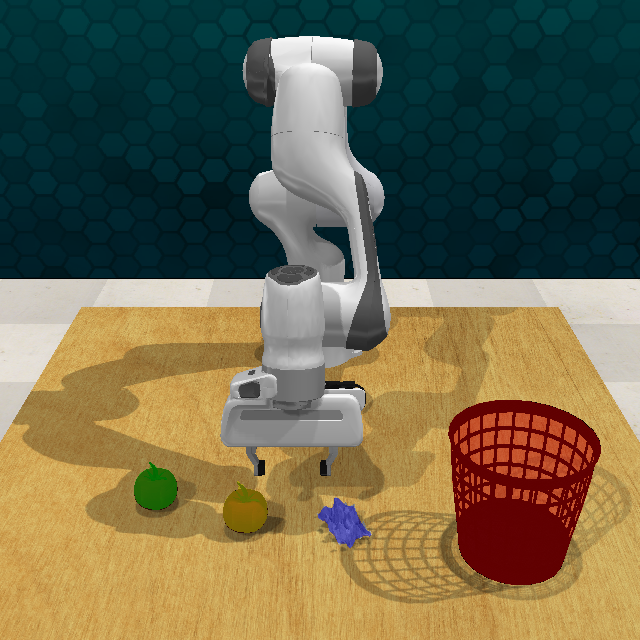

calling detect VLM enable: True
[interfaces.py | 16:30:8] completed waypoint 31 (wp: [ 0.303 -0.039  0.848], actual: [ 0.302 -0.039  0.848], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.112)
calling detect VLM enable: True
[interfaces.py | 16:30:11] completed waypoint 32 (wp: [ 0.304 -0.035  0.83 ], actual: [ 0.303 -0.035  0.831], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.097)
calling detect VLM enable: True
[interfaces.py | 16:30:14] completed waypoint 33 (wp: [ 0.303 -0.03   0.814], actual: [ 0.303 -0.03   0.814], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.082)
calling detect VLM enable: True
[interfaces.py | 16:30:18] completed waypoint 34 (wp: [ 0.304 -0.024  0.8  ], actual: [ 0.303 -0.025  0.801], target: [0.308 0.033 0.762], start: [0.287 0.006 1.469], dist2target: 0.069)
calling detect VLM enable: True
[interfaces.py | 16:30:21] completed waypoint 35 (wp: [ 0.304 -0.019  0.789], actual: [ 0.304

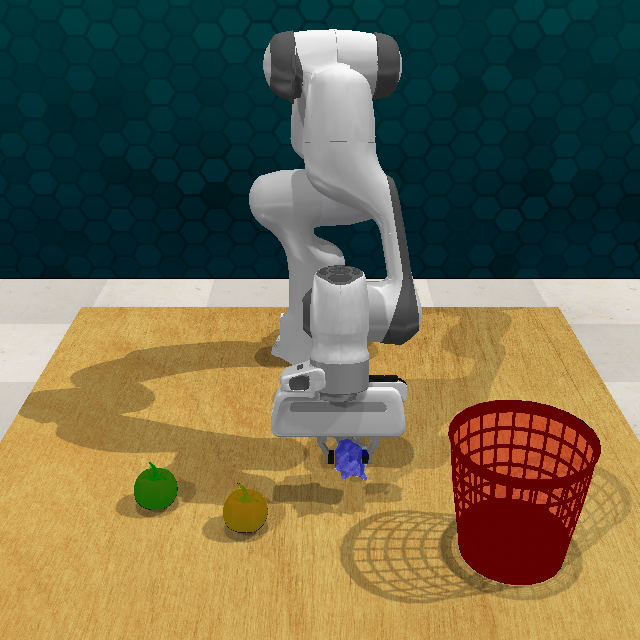

calling detect VLM enable: True
[interfaces.py | 16:30:51] completed waypoint 4 (wp: [0.231 0.027 0.82 ], actual: [0.231 0.027 0.819], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.347)
calling detect VLM enable: True
[interfaces.py | 16:30:54] completed waypoint 5 (wp: [0.21  0.044 0.84 ], actual: [0.21  0.043 0.84 ], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.326)
calling detect VLM enable: True
[interfaces.py | 16:30:58] completed waypoint 6 (wp: [0.193 0.066 0.861], actual: [0.192 0.065 0.861], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.302)
calling detect VLM enable: True
[interfaces.py | 16:31:1] completed waypoint 7 (wp: [0.18  0.092 0.883], actual: [0.18  0.091 0.882], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.274)
calling detect VLM enable: True
[interfaces.py | 16:31:5] completed waypoint 8 (wp: [0.172 0.121 0.905], actual: [0.171 0.121 0.904], target: [0.287 0.28

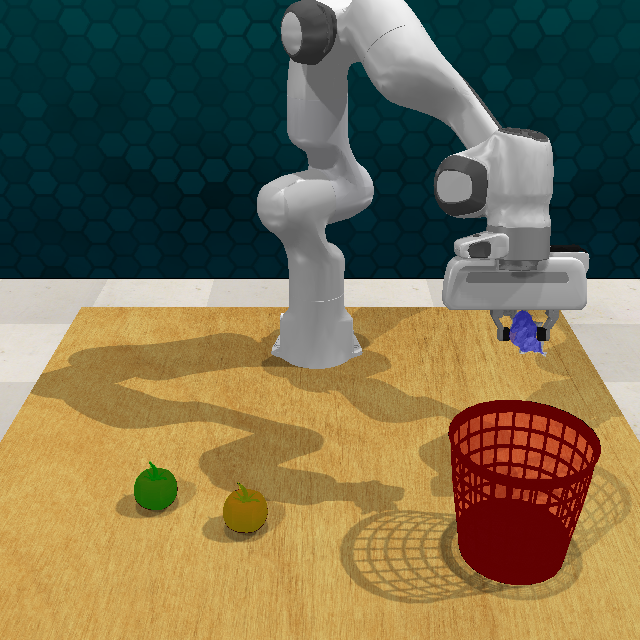

calling detect VLM enable: True
[interfaces.py | 16:31:26] completed waypoint 14 (wp: [0.219 0.276 1.021], actual: [0.218 0.276 1.02 ], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.074)
calling detect VLM enable: True
[interfaces.py | 16:31:30] completed waypoint 15 (wp: [0.243 0.286 1.035], actual: [0.242 0.286 1.035], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.046)
calling detect VLM enable: True
[interfaces.py | 16:31:33] completed waypoint 16 (wp: [0.272 0.289 1.047], actual: [0.271 0.288 1.046], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.016)
calling detect VLM enable: True
[interfaces.py | 16:31:37] completed waypoint 17 (wp: [0.307 0.281 1.056], actual: [0.306 0.281 1.055], target: [0.287 0.284 1.045], start: [0.323 0.022 0.766], dist2target: 0.022)
[interfaces.py | 16:31:37] skip waypoint 18 because it is moving in opposite direction of the final target
[interfaces.py | 16:31:37] skip waypoint 

In [2]:
vlmpipeline = VLM(
    owlv2_model_path,
    sam_model_path,
    xmem_model_path,
    resnet_18_path,
    resnet_50_path,
    verbose=True,
    resize_to=[640,640]
)

# uncomment this if you'd like to change the language model (e.g., for faster speed or lower cost)
# for lmp_name, cfg in config['lmp_config']['lmps'].items():
#     cfg['model'] = 'gpt-3.5-turbo'

# initialize env and voxposer ui
visualizer = ValueMapVisualizer(config["visualizer"])
env = VoxPoserRLBench(visualizer=visualizer, headless=True, vlmpipeline=vlmpipeline, scene_obs_size=640)
engine_sparkv3 = getattr(engine_interfaces, sparkv3_engine_config["type"])(
    **sparkv3_engine_config
)  # engine initialization
engine_erniev4 = getattr(engine_interfaces, erniev4_engine_config["type"])(
    **erniev4_engine_config
)  # engine initialization
lmps, lmp_env = setup_LMP(env, config, debug=False, engine_call_fn=engine_erniev4)
voxposer_ui = lmps["plan_ui"]

# below are the tasks that have object names added to the "task_object_names.json" file
# uncomment one to use
env.load_task(tasks.PutRubbishInBin)
# env.load_task(tasks.LampOff)
# env.load_task(tasks.OpenWineBottle)
# env.load_task(tasks.PushButton)
# env.load_task(tasks.TakeOffWeighingScales)
# env.load_task(tasks.MeatOffGrill)
# env.load_task(tasks.SlideBlockToTarget)
# env.load_task(tasks.TakeLidOffSaucepan)
# env.load_task(tasks.TakeUmbrellaOutOfUmbrellaStand)
descriptions, obs = env.reset()
controller_config = config["controller"]
planner_config = config["planner"]
lmp_env_config = config["lmp_config"]["env"]
lmps_config = config["lmp_config"]["lmps"]
env_name = config["env_name"]
# LMP env wrapper
lmp_env = LMP_interface(
    env, lmp_env_config, controller_config, planner_config, env_name=env_name
)
# object = "tomato"
# result = lmp_env.detect(object)
set_lmp_objects(
    lmps, env.get_object_names()
)  # set the object names to be used by voxposer

# 关于task description从哪里来的: rlbench 内置了一些task，并且这些task有多种描述，ref:https://github.com/stepjam/RLBench/blob/master/tutorials/simple_task.md
instruction = np.random.choice(descriptions)
instruction = "put rubbish in bin"
# instruction = "throw away the trash, leaving any other objects alone"
voxposer_ui(instruction)


In [ ]:
for idx, item in enumerate(result):
    pcd_vector = o3d.geometry.PointCloud()
    pcd_vector.points = o3d.utility.Vector3dVector(item['_point_cloud_world'])
    # origin = pcd_vector.get_center()
    # coordinate = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.2,origin=origin)
    # o3d.visualization.draw_geometries([pcd_vector,coordinate])
    o3d.io.write_point_cloud(f'{object}_{idx}.pcd',pcd_vector)
print(result)
    # set_lmp_objects(
    #     lmps, env.get_object_names()
    # )  # set the object names to be used by voxposer

    # # 关于task description从哪里来的: rlbench 内置了一些task，并且这些task有多种描述，ref:https://github.com/stepjam/RLBench/blob/master/tutorials/simple_task.md
    # instruction = np.random.choice(descriptions)
    # # instruction = "throw away the trash, leaving any other objects alone"
    # voxposer_ui(instruction)


In [ ]:
disp.stop()